<a href="https://colab.research.google.com/github/zainaae/Household-Size-prediction/blob/main/Household_size_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   index  statefips  countyfips  avghouseholdsize  \
0      0          2          13              2.43   
1      1          2          16              3.59   
2      2          2          20              2.77   
3      3          2          50              3.86   
4      4          2          60              2.50   

                            geography  
0      Aleutians East Borough, Alaska  
1  Aleutians West Census Area, Alaska  
2      Anchorage Municipality, Alaska  
3          Bethel Census Area, Alaska  
4         Bristol Bay Borough, Alaska  


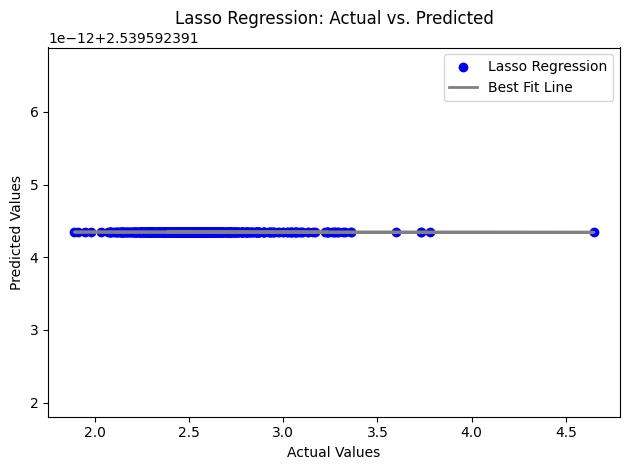

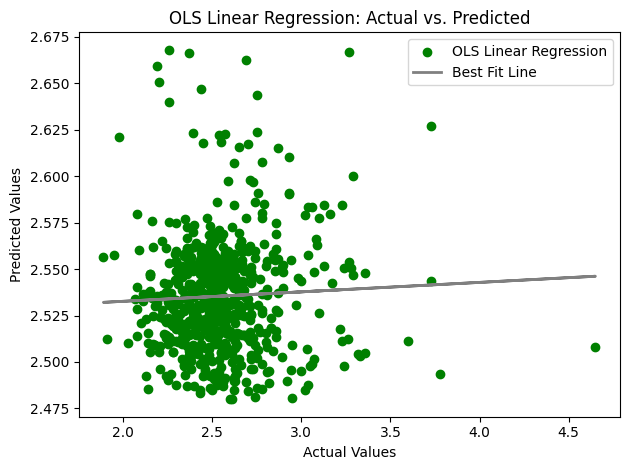

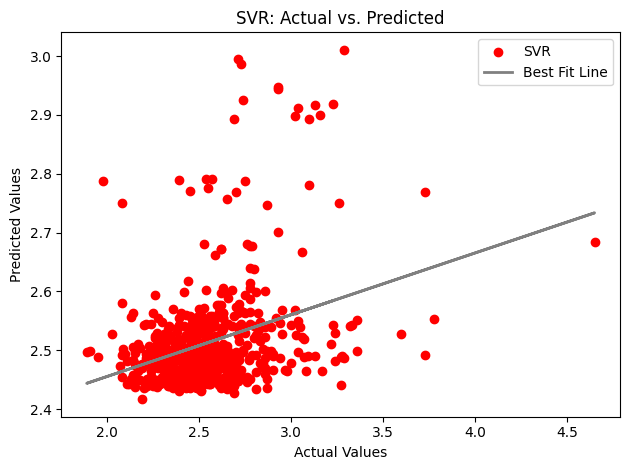

Lasso Regression:
Mean Squared Error: 0.0734312794313732
Root Mean Squared Error: 0.27098206477804615
Mean Absolute Error: 0.18986632460167432
R-squared: -0.0004601194261393271

OLS Linear Regression:
Mean Squared Error: 0.07368446263478161
Root Mean Squared Error: 0.27144882139140264
Mean Absolute Error: 0.1899903735097494
R-squared: -0.0039095989923423335

Support Vector Regression (SVR):
Mean Squared Error: 0.06635437410990941
Root Mean Squared Error: 0.2575934279245288
Mean Absolute Error: 0.17724866610733173
R-squared: 0.09595875816806188


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/avg-household-size.csv')
print(data.head())

X = data[['statefips', 'countyfips']].values
y = data['avghouseholdsize'].values

# Handle missing values
X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))  # Replace missing values with the mean of the respective column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regularization
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# OLS (Linear regression)
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
y_pred_ols = ols_model.predict(X_test_scaled)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Lasso Regression plot
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs. Predicted')

# Calculate and plot the best fit line
best_fit_lasso = np.polyfit(y_test, y_pred_lasso, 1)
plt.plot(y_test, np.polyval(best_fit_lasso, y_test), color='grey', linewidth=2, label='Best Fit Line')

plt.legend()
plt.tight_layout()
plt.show()

# OLS (Linear Regression) plot
plt.scatter(y_test, y_pred_ols, label='OLS Linear Regression', color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('OLS Linear Regression: Actual vs. Predicted')

# Calculate and plot the best fit line
best_fit_ols = np.polyfit(y_test, y_pred_ols, 1)
plt.plot(y_test, np.polyval(best_fit_ols, y_test), color='grey', linewidth=2, label='Best Fit Line')

plt.legend()
plt.tight_layout()
plt.show()

# SVR plot
plt.scatter(y_test, y_pred_svr, label='SVR', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs. Predicted')

# Calculate and plot the best fit line
best_fit_svr = np.polyfit(y_test, y_pred_svr, 1)
plt.plot(y_test, np.polyval(best_fit_svr, y_test), color='grey', linewidth=2, label='Best Fit Line')

plt.legend()
plt.tight_layout()
plt.show()

print('Lasso Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))
print('R-squared:', r2_score(y_test, y_pred_lasso))

print('\nOLS Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ols))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_ols)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ols))
print('R-squared:', r2_score(y_test, y_pred_ols))

print('\nSupport Vector Regression (SVR):')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))
print('R-squared:', r2_score(y_test, y_pred_svr))
